In [1]:
import os
def get_dir(dir):
    p = []
    for root, dirs, files in os.walk(dir, topdown=False):
        for name in files:
                if name != '.DS_Store':
                    if not ('ipynb' in name):
                        p.append(os.path.join(root, name))
    return p

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport as pp

In [3]:
state = get_dir('./Datathon Final dataset/state election 2074/')

In [4]:
state

['./Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/२/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/२/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/२/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/२/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/मुस्तांग/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/मुस्तांग/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/कास्की/३/क.csv',
 './Datathon Final dataset/sta

In [40]:
df = pd.concat(map(pd.read_csv, state), ignore_index=True)


In [6]:
df.head()

SerialNo StateID           CandidateName Gender Age  \
0     2339       4  विष्णु प्रसाद लामिछाने  पुरुष  46   
1     2340       4          वाल कृष्ण गैरे  पुरुष  56   
2     2341       4     विष्‍णु प्रसाद बोटे  पुरुष  26   
3     2342       4        भोज बहादुर चौधरी  पुरुष  41   
4     2343       4       गिर बहादुर महतारा  पुरुष  59   

                          PoliticalPartyName                     DistrictName  \
0                            नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
1  नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
2                    जनसमाजवादी पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
3                    नयाँ शक्ति पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
4                         राष्ट्रिय जनमोर्चा  नवलपरासी (बर्दघाट सुस्ता पूर्व)   

  CenterConstID SCConstID  TotalVotesReceived  EStatus  Rank  
0             2         1             19222.0  Elected   1.0  
1             2         1             18161.0      NaN   2.0  
2             2         1               886.0      NaN   3.0  
3             2         1               397.0      NaN   4.0  
4             2         1               216.0      NaN   5.0

In [8]:
df.shape

(252, 12)

Observation: 252 rows and 12 columns

In [9]:
for i in df.columns:
    print(i)

SerialNo
StateID
CandidateName
Gender
Age
PoliticalPartyName
DistrictName
CenterConstID
SCConstID
TotalVotesReceived
EStatus
Rank


In [10]:
# Checking Null Values

In [11]:
df.isnull().sum()

SerialNo                3
StateID                 3
CandidateName           0
Gender                  1
Age                     4
PoliticalPartyName      1
DistrictName            3
CenterConstID           3
SCConstID               1
TotalVotesReceived      2
EStatus               214
Rank                    8
dtype: int64

# High Outliers lies on 'ESTatus Column'

In [12]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]


In [13]:
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4))

SerialNo 0.0119
StateID 0.0119
Gender 0.004
Age 0.0159
PoliticalPartyName 0.004
DistrictName 0.0119
CenterConstID 0.0119
SCConstID 0.004
TotalVotesReceived 0.0079
EStatus 0.8492
Rank 0.0317


In [14]:
for feature in df.columns:
    print(df, df[feature].unique(), len(df[feature].unique()))
    print('----------------------------------------------')

    SerialNo StateID           CandidateName Gender Age  \
0       2339       4  विष्णु प्रसाद लामिछाने  पुरुष  46   
1       2340       4          वाल कृष्ण गैरे  पुरुष  56   
2       2341       4     विष्‍णु प्रसाद बोटे  पुरुष  26   
3       2342       4        भोज बहादुर चौधरी  पुरुष  41   
4       2343       4       गिर बहादुर महतारा  पुरुष  59   
..       ...     ...                     ...    ...  ..   
247     2091       4        गोमा देवी कार्की  महिला  33   
248     2092       4         हरी बहादुर राना  पुरुष  55   
249     2093       4          राम शरण वस्नेत  पुरुष  55   
250     2094       4         राजेन्द्र बजगाई  पुरुष  44   
251     2095       4            प्रसाद गुरुङ  पुरुष  46   

                            PoliticalPartyName  \
0                              नेपाली काँग्रेस   
1    नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)   
2                      जनसमाजवादी पार्टी नेपाल   
3                      नयाँ शक्ति पार्टी नेपाल   
4                           राष्ट्रिय जनम

In [25]:
df['PoliticalPartyName'].value_counts().sort_values(ascending=False)

नेपाली काँग्रेस                                     36
नयाँ शक्ति पार्टी नेपाल                             25
राष्ट्रिय जनमोर्चा                                  21
संघीय समाजवादी फोरम नेपाल                           20
राष्ट्रिय प्रजातन्त्र पार्टी                        18
नेपाल कम्युनिष्ट पार्टी (एमाले)                     18
राष्ट्रिय जनमुक्ति पार्टी                           17
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)           16
मंगोल नेशनल अर्गनाइजेसन                             16
स्वतन्त्र                                           11
विवेकशील साझा पार्टी                                 9
राष्ट्रिय प्रजातन्त्र पार्टी (प्रजातान्त्रिक)        9
देशभक्त जनगणतान्त्रिक मोर्चा नेपाल                   7
नेपाल दलित पार्टी                                    5
जनसमाजवादी पार्टी नेपाल                              4
नेपाल कम्युनिष्ट पार्टी (माले)                       4
आमूल परिवर्तन मसिहा पार्टी नेपाल                     4
एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)     4
राष्ट्रिय 

Observation: One variable is wrong

So many redundant exist.

In [24]:
redundant_party = ['?','wrc दल',' WRC',' WRC Sangathan']
for i in redundant_party:
    index_names = df[ df['PoliticalPartyName'] == i ].index
    df.drop(index_names, inplace = True)
    

In [26]:
elected_dataset = df[df['EStatus']=='Elected']
elected_dataset.head()

SerialNo StateID               CandidateName Gender   Age  \
0      2339       4      विष्णु प्रसाद लामिछाने  पुरुष    46   
11     2350       4          जनक लाल श्रेक्ष्‍ठ  पुरुष    67   
22     2319       4  कृष्णचन्द्र नेपाली पोख्रेल  पुरुष    66   
32     2329       4       रोशन बहादुर गाहा थापा  पुरुष    54   
42     2230       4          मोहन प्रसाद रेग्मी  पुरुष  58.0   

                 PoliticalPartyName                     DistrictName  \
0                   नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
11  नेपाल कम्युनिष्ट पार्टी (एमाले)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
22                  नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
32  नेपाल कम्युनिष्ट पार्टी (एमाले)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
42  नेपाल कम्युनिष्ट पार्टी (एमाले)                         स्याङ्जा   

   CenterConstID SCConstID  TotalVotesReceived  EStatus  Rank  
0              2         1             19222.0  Elected   1.0  
11             2         2             19376.0  Elected   1.0  
22             1         1             17683.0  Elected   1.0  
32             1         2             20790.0  Elected   1.0  
42             2         1             16613.0  Elected   1.0

In [27]:
elected_dataset["PoliticalPartyName"].value_counts()

नेपाल कम्युनिष्ट पार्टी (एमाले)              16
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)    10
नेपाली काँग्रेस                               6
राष्ट्रिय जनमोर्चा                            2
स्वतन्त्र                                     1
नयाँ शक्ति पार्टी नेपाल                       1
Name: PoliticalPartyName, dtype: int64

<AxesSubplot:xlabel='PoliticalPartyName', ylabel='count'>

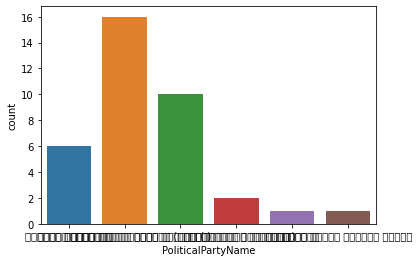

In [28]:
sns.countplot(elected_dataset['PoliticalPartyName'])

In [29]:
# Female-Candidate

In [30]:
female_candidate = df[df['Gender']=='महिला']

In [31]:
female_candidate.head()

SerialNo StateID     CandidateName Gender   Age         PoliticalPartyName  \
10     2349       4        देवका गौतम  महिला    36                  स्वतन्त्र   
19     2358       4  अञ्जना डल्लाकोटी  महिला    33  राष्ट्रिय शिवसेना पार्टी    
34     2331       4   पदमाया गाहा मगर  महिला    25  राष्ट्रिय जनमुक्ति पार्टी   
46     2234       4   कृष्ण माया राना  महिला  49.0  राष्ट्रिय जनमुक्ति पार्टी   
47     2235       4     मेनुका सार्की  महिला  39.0         राष्ट्रिय जनमोर्चा   

                       DistrictName CenterConstID SCConstID  \
10  नवलपरासी (बर्दघाट सुस्ता पूर्व)             2         1   
19  नवलपरासी (बर्दघाट सुस्ता पूर्व)             2         2   
34  नवलपरासी (बर्दघाट सुस्ता पूर्व)             1         2   
46                         स्याङ्जा             2         1   
47                         स्याङ्जा             2         1   

    TotalVotesReceived EStatus  Rank  
10                 6.0     NaN  11.0  
19                10.0     NaN   9.0  
34               353.0     NaN   3.0  
46               123.0     NaN   5.0  
47               113.0     NaN   6.0

In [32]:
female_candidate.isnull().sum()

SerialNo               0
StateID                0
CandidateName          0
Gender                 0
Age                    0
PoliticalPartyName     1
DistrictName           0
CenterConstID          0
SCConstID              0
TotalVotesReceived     0
EStatus               22
Rank                   0
dtype: int64

In [33]:
wining_female_candidate = elected_dataset[elected_dataset['Gender']=='महिला']

In [34]:
wining_female_candidate

SerialNo StateID CandidateName Gender Age  \
173     2202       4   आशा कोइराला  महिला  47   

                            PoliticalPartyName DistrictName CenterConstID  \
173  नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)        तनहुँ             2   

    SCConstID  TotalVotesReceived  EStatus  Rank  
173         1             16646.0  Elected   1.0

Observation: Only one female has won for state election

In [35]:
# Extracting  Numerical Column
numerical_colum = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [36]:
numerical_colum

['TotalVotesReceived', 'Rank']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 251
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SerialNo            244 non-null    object 
 1   StateID             244 non-null    object 
 2   CandidateName       247 non-null    object 
 3   Gender              246 non-null    object 
 4   Age                 243 non-null    object 
 5   PoliticalPartyName  246 non-null    object 
 6   DistrictName        244 non-null    object 
 7   CenterConstID       244 non-null    object 
 8   SCConstID           247 non-null    object 
 9   TotalVotesReceived  247 non-null    float64
 10  EStatus             36 non-null     object 
 11  Rank                241 non-null    float64
dtypes: float64(2), object(10)
memory usage: 25.1+ KB


In [60]:
numerical_column =['SerialNo', 'StateID', 'Age', 'CenterConstID', 'TotalVotesReceived', 'Rank']

In [50]:
for i in numerical_colum:
    print(df[i].unique(), len(df[i].unique()))
    print('-------------------------------------')

[ 1.9222e+04  1.8161e+04  8.8600e+02  3.9700e+02  2.1600e+02  1.4500e+02
  1.1800e+02  9.2000e+01  8.6000e+01  6.0000e+00  1.9376e+04  1.9047e+04
  5.3300e+02  1.1900e+02  7.2000e+01  6.2000e+01  4.9000e+01  4.7000e+01
  1.0000e+01  1.0000e+00  1.7683e+04  1.7311e+04  1.0440e+03  8.2700e+02
  7.5500e+02  5.3400e+02  2.4500e+02  2.2900e+02  2.1800e+02  2.0790e+04
  1.9941e+04  3.5300e+02  3.3200e+02  2.8700e+02  1.9200e+02  6.9000e+01
  6.1000e+01  5.5000e+01  3.9000e+01  1.6613e+04  1.3140e+04  1.6500e+02
  1.6000e+02  1.2300e+02  1.1300e+02  9.9000e+01  1.9170e+04  1.7630e+04
  6.0900e+02  9.6000e+01  9.4000e+01  1.7392e+04  1.4666e+04  4.4400e+02
  1.5600e+02  1.3300e+02         nan  2.0248e+04  1.4510e+04  3.7500e+02
  3.3900e+02  3.3100e+02  3.5000e+01  1.1670e+03  6.5700e+02  2.5840e+03
  2.2590e+03  3.2000e+01  1.2000e+01  1.5823e+04  1.3057e+04  8.9900e+02
  7.9600e+02  4.7900e+02  3.0000e+02  2.6500e+02  1.3000e+02  8.2000e+01
  2.1000e+01  1.6167e+04  1.0876e+04  4.8800e+02  4

In [52]:
for i in df.columns:
    df[i] = df[i].fillna(np.NaN)

In [55]:
for i in df.columns:
    df[i] = df[i].replace('?', np.NaN)

In [61]:
for i in numerical_column:
    df[i] = df[i].astype(float)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SerialNo            248 non-null    float64
 1   StateID             248 non-null    float64
 2   CandidateName       251 non-null    object 
 3   Gender              250 non-null    object 
 4   Age                 247 non-null    float64
 5   PoliticalPartyName  249 non-null    object 
 6   DistrictName        248 non-null    object 
 7   CenterConstID       248 non-null    float64
 8   SCConstID           250 non-null    object 
 9   TotalVotesReceived  250 non-null    float64
 10  EStatus             37 non-null     object 
 11  Rank                244 non-null    float64
dtypes: float64(6), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

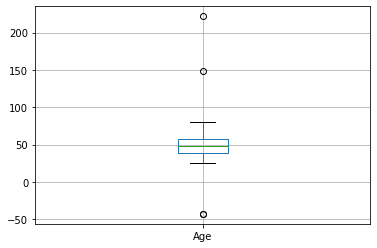

In [63]:
df.boxplot('Age')

In [64]:
df['Age'].describe()

count    247.000000
mean      48.348178
std       19.295104
min      -43.000000
25%       38.500000
50%       48.000000
75%       57.500000
max      222.000000
Name: Age, dtype: float64

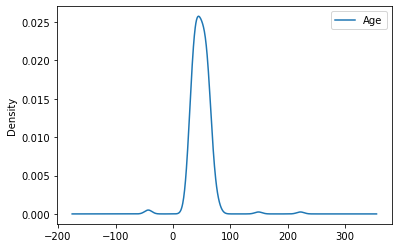

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [66]:
df.columns

Index(['SerialNo', 'StateID', 'CandidateName', 'Gender', 'Age',
       'PoliticalPartyName', 'DistrictName', 'CenterConstID', 'SCConstID',
       'TotalVotesReceived', 'EStatus', 'Rank'],
      dtype='object')

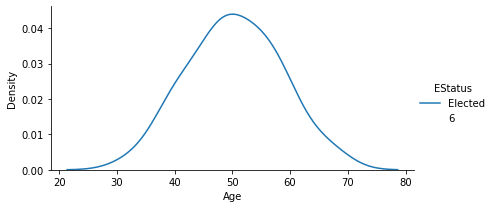

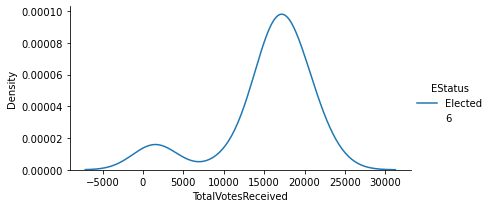

In [67]:
required_column = ['Age','TotalVotesReceived']
for feature in required_column:
    grid=sns.FacetGrid(df,hue='EStatus',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

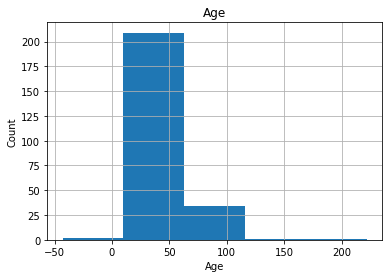

In [68]:
for feature in ['Age']:
    dataset=df.copy()
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Outlier Exist

In [69]:
def outlier_threshold(df,x):
    q1 = df[x].quantile(0.3)
    q3 = df[x].quantile(0.75)
    IQR = q3-q1
    low  = q1 - 1.5*IQR
    high = q3 + 1.5*IQR
    return low, high

In [70]:
low, high = outlier_threshold(df, 'Age')

In [71]:
low,high

(13.75, 83.75)

In [72]:
median= df['Age'].median()

In [73]:
df["Age"] = np.where(df["Age"] <low, median, df['Age'])

In [74]:
df["Age"] = np.where(df["Age"] >high, median, df['Age'])

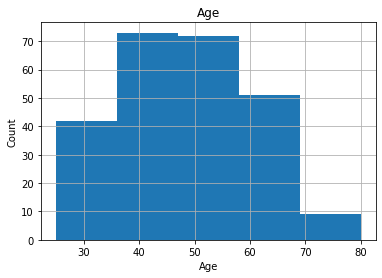

In [75]:
for feature in ['Age']:
    dataset=df.copy()
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [83]:
df['Gender'].unique()

array(['पुरुष', 'महिला', nan, 'पुरुष ', ' महिला '], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

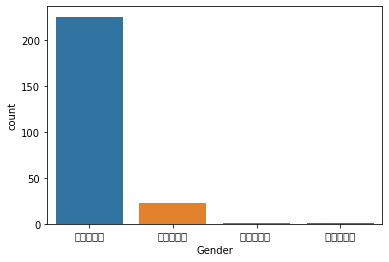

In [76]:
sns.countplot(df['Gender'])

In [85]:
df['Gender'] = df['Gender'].str.replace(' महिला ', "महिला")

In [86]:
df['Gender'] = df['Gender'].str.replace('पुरुष ', "पुरुष")

<AxesSubplot:xlabel='Gender', ylabel='count'>

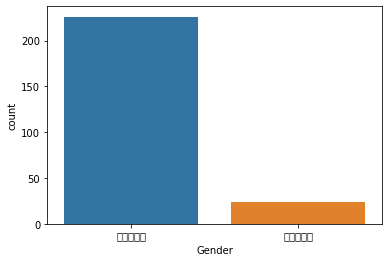

In [87]:
sns.countplot(df['Gender'])

In [88]:
df.groupby('Gender').mean()

SerialNo  StateID        Age  CenterConstID  TotalVotesReceived  \
Gender                                                                       
पुरुष   2294.475336      4.0  48.918919       1.526786         4515.111111   
महिला   2206.458333      4.0  38.041667       1.791667         2357.916667   

            Rank  
Gender            
पुरुष   4.333333  
महिला   9.625000

In [89]:
df.groupby(['DistrictName']).size().sort_values(ascending=False)

DistrictName
कास्की                             64
नवलपरासी (बर्दघाट सुस्ता पूर्व)    42
तनहुँ                              33
गोरखा                              21
स्याङ्जा                           21
बागलुङ                             20
लमजुंग                             15
पर्वत                              14
मुस्तांग                            6
म्याग्दी                            6
मनाङ्ग                              3
 1                                  1
 Nan                                1
 तनहुँ                              1
dtype: int64

In [98]:
df['DistrictName'] = df['DistrictName'].str.replace("  कास्की", "कास्की")

In [106]:
df['DistrictName'] = df['DistrictName'].replace(" Nan", np.NaN)

In [109]:
df['DistrictName'] = df['DistrictName'].replace(" 1", np.NaN)

In [110]:
df['DistrictName'] = df['DistrictName'].fillna(df['DistrictName'].mode())

In [111]:
df.groupby(['DistrictName']).size().sort_values(ascending=False)

DistrictName
कास्की                             64
नवलपरासी (बर्दघाट सुस्ता पूर्व)    42
तनहुँ                              33
गोरखा                              21
स्याङ्जा                           21
बागलुङ                             20
लमजुंग                             15
पर्वत                              14
मुस्तांग                            6
म्याग्दी                            6
मनाङ्ग                              3
 तनहुँ                              1
dtype: int64

In [112]:
df['DistrictName'].unique()

array(['नवलपरासी (बर्दघाट सुस्ता पूर्व)', 'स्याङ्जा', nan, 'मुस्तांग',
       'कास्की', 'लमजुंग', 'बागलुङ', 'तनहुँ', ' तनहुँ', 'पर्वत',
       'म्याग्दी', 'मनाङ्ग', 'गोरखा'], dtype=object)

In [113]:
numerical_colum = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [116]:
df.groupby('Gender').mean()

SerialNo  StateID        Age  CenterConstID  TotalVotesReceived  \
Gender                                                                       
पुरुष   2294.475336      4.0  48.918919       1.526786         4515.111111   
महिला   2206.458333      4.0  38.041667       1.791667         2357.916667   

            Rank  
Gender            
पुरुष   4.333333  
महिला   9.625000

In [117]:
##Handling NullValues

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SerialNo            248 non-null    float64
 1   StateID             248 non-null    float64
 2   CandidateName       251 non-null    object 
 3   Gender              250 non-null    object 
 4   Age                 247 non-null    float64
 5   PoliticalPartyName  249 non-null    object 
 6   DistrictName        246 non-null    object 
 7   CenterConstID       248 non-null    float64
 8   SCConstID           250 non-null    object 
 9   TotalVotesReceived  250 non-null    float64
 10  EStatus             37 non-null     object 
 11  Rank                244 non-null    float64
dtypes: float64(6), object(6)
memory usage: 23.8+ KB


In [ ]:
df.drop(['SerialNo'],axis =1, inplace = True)

In [128]:
df.drop(['StateID'],axis =1, inplace = True)

In [129]:
df['CenterConstID'] = df['CenterConstID'].fillna(df['CenterConstID'].mode())

In [130]:
rank_1 = df[df['Rank']==1]


In [131]:
rank_1['EStatus'].value_counts()

Elected        36
Not Elected     1
Name: EStatus, dtype: int64

# Hence,all missing values are not ELected one.

In [132]:
df['EStatus'] = df['EStatus'].fillna('Not Elected')

In [133]:
df.head()

CandidateName Gender   Age  \
0  विष्णु प्रसाद लामिछाने  पुरुष  46.0   
1          वाल कृष्ण गैरे  पुरुष  56.0   
2     विष्‍णु प्रसाद बोटे  पुरुष  26.0   
3        भोज बहादुर चौधरी  पुरुष  41.0   
4       गिर बहादुर महतारा  पुरुष  59.0   

                          PoliticalPartyName                     DistrictName  \
0                            नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
1  नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
2                    जनसमाजवादी पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
3                    नयाँ शक्ति पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
4                         राष्ट्रिय जनमोर्चा  नवलपरासी (बर्दघाट सुस्ता पूर्व)   

   CenterConstID SCConstID  TotalVotesReceived      EStatus  Rank  
0            2.0         1             19222.0      Elected   1.0  
1            2.0         1             18161.0  Not Elected   2.0  
2            2.0         1               886.0  Not Elected   3.0  
3            2.0         1               397.0  Not Elected   4.0  
4            2.0         1               216.0  Not Elected   5.0

In [134]:
df.isnull().sum()

CandidateName         1
Gender                2
Age                   5
PoliticalPartyName    3
DistrictName          6
CenterConstID         4
SCConstID             2
TotalVotesReceived    2
EStatus               0
Rank                  8
dtype: int64

In [135]:
feature_with_null_value = feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [138]:
feature_with_na

['Gender',
 'Age',
 'PoliticalPartyName',
 'DistrictName',
 'CenterConstID',
 'SCConstID',
 'TotalVotesReceived',
 'Rank']

In [139]:
categorical_feather_with_nan = [feature for feature in feature_with_na if df[feature].dtype =='O']

In [140]:
categorical_feather_with_nan

['Gender', 'PoliticalPartyName', 'DistrictName', 'SCConstID']

In [141]:
for i in categorical_feather_with_nan:
    df[i] = df[i].replace('nan',np.NaN)


In [142]:
numerical_feature_with_nan = [feature for feature in feature_with_na if df[feature].dtype !='O']

In [143]:
numerical_feature_with_nan

['Age', 'CenterConstID', 'TotalVotesReceived', 'Rank']

In [144]:
def impute_nan_num(df, variable):
    median = df[variable].median()
    
    df[variable+'_median'] = df[variable].fillna(median)

In [146]:
for i in numerical_feature_with_nan:
    impute_nan_num(df,i)

In [147]:
def impute_nan_cat(df, variable):
    mode = df[variable].mode()
    df[variable+'_mode'] = df[variable].fillna(mode)

In [148]:
for i in categorical_feather_with_nan:
    impute_nan_cat(df,i)

In [149]:
df.isnull().sum()

CandidateName                1
Gender                       2
Age                          5
PoliticalPartyName           3
DistrictName                 6
CenterConstID                4
SCConstID                    2
TotalVotesReceived           2
EStatus                      0
Rank                         8
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Rank_median                  0
Gender_mode                  2
PoliticalPartyName_mode      3
DistrictName_mode            6
SCConstID_mode               2
dtype: int64

In [156]:
df['CandidateName'].unique()

array(['विष्णु प्रसाद लामिछाने', 'वाल कृष्ण गैरे', 'विष्णु प्रसाद बोटे',
       'भोज बहादुर चौधरी', 'गिर बहादुर महतारा', 'नुन बहादुर आले मगर',
       'तिल बहादुर झेंडी मगर', 'घनश्याम अधिकारी', 'बुद्धिलाल राना मगर',
       'चोला कान्त कंडेल', 'देवका गौतम', 'जनक लाल श्रेक्ष्ठ',
       'गणेश मान श्रेष्ठ', 'मोहन सिँह थापा वाकवल',
       'लोक बहादुर के.सी खत्री', 'टेक प्रसाद पोख्रेल',
       'अर्जुन कुमार भुसाल', 'श्याम बहादुर कुमाल', 'कृष्ण बहादुर दर्जी',
       'अञ्जना डल्लाकोटी', 'धर्म वहादुर घर्ति क्षेत्री',
       'हरी कुमार श्रेष्ठ', 'कृष्णचन्द्र नेपाली पोख्रेल',
       'सुर्य प्रसाद न्यौपाने', 'सन्तोष थापा', 'भिम प्रसाद आचार्य',
       'चन्द्रदत्त सापकोटा', 'रुम वहादुर मगर', 'शरद मणी खरेल',
       'टेकदत्तहरि पौडेल', 'धन बहादुर गुरुङ', 'मन बहादुर लुंगेली',
       'रोशन बहादुर गाहा थापा', 'महेन्द्र ध्वज जि.सि.', 'पदमाया गाहा मगर',
       'रुद्र बहादुर गुरुङ्ग', 'राम प्रसाद चापागाई', 'राम बहादुर श्रेष्ठ',
       'विष्णु प्रसाद खत्री केसी', 'मणी प्रसाद न्यौपाने',
       'टम बहादुर थापा 

In [155]:
df['CandidateName'] = df['CandidateName'].str.replace('\u200d','')       

In [157]:
df['CandidateName'].unique()

array(['विष्णु प्रसाद लामिछाने', 'वाल कृष्ण गैरे', 'विष्णु प्रसाद बोटे',
       'भोज बहादुर चौधरी', 'गिर बहादुर महतारा', 'नुन बहादुर आले मगर',
       'तिल बहादुर झेंडी मगर', 'घनश्याम अधिकारी', 'बुद्धिलाल राना मगर',
       'चोला कान्त कंडेल', 'देवका गौतम', 'जनक लाल श्रेक्ष्ठ',
       'गणेश मान श्रेष्ठ', 'मोहन सिँह थापा वाकवल',
       'लोक बहादुर के.सी खत्री', 'टेक प्रसाद पोख्रेल',
       'अर्जुन कुमार भुसाल', 'श्याम बहादुर कुमाल', 'कृष्ण बहादुर दर्जी',
       'अञ्जना डल्लाकोटी', 'धर्म वहादुर घर्ति क्षेत्री',
       'हरी कुमार श्रेष्ठ', 'कृष्णचन्द्र नेपाली पोख्रेल',
       'सुर्य प्रसाद न्यौपाने', 'सन्तोष थापा', 'भिम प्रसाद आचार्य',
       'चन्द्रदत्त सापकोटा', 'रुम वहादुर मगर', 'शरद मणी खरेल',
       'टेकदत्तहरि पौडेल', 'धन बहादुर गुरुङ', 'मन बहादुर लुंगेली',
       'रोशन बहादुर गाहा थापा', 'महेन्द्र ध्वज जि.सि.', 'पदमाया गाहा मगर',
       'रुद्र बहादुर गुरुङ्ग', 'राम प्रसाद चापागाई', 'राम बहादुर श्रेष्ठ',
       'विष्णु प्रसाद खत्री केसी', 'मणी प्रसाद न्यौपाने',
       'टम बहादुर थापा 

In [161]:
df.isnull().sum()

CandidateName                0
Gender                       2
Age                          5
PoliticalPartyName           3
DistrictName                 6
CenterConstID                4
SCConstID                    2
TotalVotesReceived           2
EStatus                      0
Rank                         8
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Rank_median                  0
Gender_mode                  2
PoliticalPartyName_mode      3
DistrictName_mode            6
SCConstID_mode               2
dtype: int64

In [163]:
df['CandidateName'] = df['CandidateName'].replace(np.NaN, df['CandidateName'].mode()[0])
df['Gender_mode'] = df['Gender_mode'].replace(np.NaN, df['Gender_mode'].mode()[0])
df['PoliticalPartyName_mode'] = df['PoliticalPartyName_mode'].replace(np.NaN, df['PoliticalPartyName_mode'].mode()[0])
df['DistrictName_mode'] = df['DistrictName_mode'].replace(np.NaN, df['DistrictName_mode'].mode()[0])
df['SCConstID_mode'] = df['SCConstID_mode'].replace(np.NaN, df['SCConstID_mode'].mode()[0])


In [164]:
df.isnull().sum()

CandidateName                0
Gender                       2
Age                          5
PoliticalPartyName           3
DistrictName                 6
CenterConstID                4
SCConstID                    2
TotalVotesReceived           2
EStatus                      0
Rank                         8
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Rank_median                  0
Gender_mode                  0
PoliticalPartyName_mode      0
DistrictName_mode            0
SCConstID_mode               0
dtype: int64

In [167]:
df.drop(['Gender','Age','PoliticalPartyName','DistrictName','CenterConstID',"TotalVotesReceived"],axis =1, inplace = True)

In [172]:
df.drop(['SCConstID'],axis =1, inplace = True)

In [168]:
df.head()

CandidateName SCConstID      EStatus  Rank  Age_median  \
0  विष्णु प्रसाद लामिछाने         1      Elected   1.0        46.0   
1          वाल कृष्ण गैरे         1  Not Elected   2.0        56.0   
2      विष्णु प्रसाद बोटे         1  Not Elected   3.0        26.0   
3        भोज बहादुर चौधरी         1  Not Elected   4.0        41.0   
4       गिर बहादुर महतारा         1  Not Elected   5.0        59.0   

   CenterConstID_median  TotalVotesReceived_median  Rank_median Gender_mode  \
0                   2.0                    19222.0          1.0       पुरुष   
1                   2.0                    18161.0          2.0       पुरुष   
2                   2.0                      886.0          3.0       पुरुष   
3                   2.0                      397.0          4.0       पुरुष   
4                   2.0                      216.0          5.0       पुरुष   

                     PoliticalPartyName_mode                DistrictName_mode  \
0                            नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
1  नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
2                    जनसमाजवादी पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
3                    नयाँ शक्ति पार्टी नेपाल  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
4                         राष्ट्रिय जनमोर्चा  नवलपरासी (बर्दघाट सुस्ता पूर्व)   

  SCConstID_mode  
0              1  
1              1  
2              1  
3              1  
4              1

In [169]:
df.describe()

Rank  Age_median  CenterConstID_median  \
count  244.000000  252.000000            252.000000   
mean     4.848361   47.972222              1.543651   
std      6.761483   11.736959              0.632833   
min      1.000000   25.000000              1.000000   
25%      2.000000   39.000000              1.000000   
50%      4.000000   48.000000              1.000000   
75%      6.000000   57.000000              2.000000   
max    101.000000   80.000000              3.000000   

       TotalVotesReceived_median  Rank_median  
count                 252.000000   252.000000  
mean                 4259.912698     4.821429  
std                  6864.556036     6.654527  
min                    -6.000000     1.000000  
25%                   101.000000     2.000000  
50%                   282.000000     4.000000  
75%                  9301.500000     6.000000  
max                 23088.000000   101.000000

In [170]:
df.isnull().sum()

CandidateName                0
SCConstID                    2
EStatus                      0
Rank                         8
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Rank_median                  0
Gender_mode                  0
PoliticalPartyName_mode      0
DistrictName_mode            0
SCConstID_mode               0
dtype: int64

In [173]:
##we fixed it